<a href="https://colab.research.google.com/github/kauebr/Projeto-Turing/blob/main/DataMining_e_Pr%C3%A9Processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




📄 **Fonte dos dados (CSV):**  
https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv

📘 **Dicionário de Dados (Data Dictionary):**  
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

 **Site Base dos dados:**  
https://opendatasus.saude.gov.br/dataset/sim/




<style>
body {
  font-family: 'Segoe UI', sans-serif;
  background-color: #f0f2f5;
  color: #2c3e50;
  padding: 2rem;
  max-width: 900px;
  margin: auto;
}

.card {
  background: white;
  border-radius: 12px;
  box-shadow: 0 4px 12px rgba(0, 0, 0, 0.08);
  padding: 1.5rem 2rem;
  margin-bottom: 2rem;
  border-left: 6px solid #3498db;
}

.card h1, .card h2 {
  margin-top: 0;
}

.card code {
  background-color: #ecf0f1;
  padding: 2px 5px;
  border-radius: 5px;
  font-family: monospace;
}

.card ul {
  padding-left: 1.2rem;
}

.card strong {
  color: #2d3436;
}
</style>

<div class="card">
  <h1>📊 Análise Exploratória dos Dados do SUS</h1>
  <p><strong>Objetivo:</strong> Higienização e compreensão dos dados, com foco na variável-alvo <code>CIRCOBITO = 2</code>.</p>
</div>

<div class="card">
  <h2>🧪 Metodologia</h2>

  <h3>1. 🔌 Conexão com a Base de Dados</h3>
  <ul>
    <li>Utilizar a biblioteca <code>pysus</code> para acessar os dados públicos do SUS.</li>
  </ul>

  <h3>2. 📊 Análise Exploratória dos Dados (EDA)</h3>
  <ul>
    <li>Mapear as relações entre <strong>todas as colunas</strong> da base.</li>
    <li>Identificar padrões, inconsistências e possíveis outliers.</li>
  </ul>

  <h3>3. 📈 Coeficientes de Correlação</h3>
  <ul>
    <li>Calcular o grau de relação de <strong>todas as variáveis</strong> com a variável-alvo <code>CIRCOBITO = 2</code>.</li>
    <li>Gerar documento para facilitar a tomada de decisão na modelagem preditiva.</li>
  </ul>

  <h3>4. 🚀 Divulgação</h3>
  <ul>
    <li>Preparar visualizações e insights obtidos na análise para <strong>divulgação no LinkedIn</strong> do projeto.</li>
  </ul>
</div>

<div class="card">
  <p>🧠 <em>Essa análise visa contribuir para decisões baseadas em evidências nos dados do sistema de saúde brasileiro.</em></p>
</div>


## 📥 Instalação do ecossistema necessário

In [1]:
!pip install pysus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

## 📖 Importando bibliotecas necessárias:

In [2]:
import pandas as pd
import numpy as np
from pysus import SIM
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
from scipy.interpolate import make_interp_spline

## ⛏️ **ETAPA 1:**  Mineração dos dados

In [3]:
# Carrega o módulo SIM
sim = SIM().load()

# Obtém os arquivos de 2023 para o estado de SP e grupo CID10
arquivos_2023 = sim.get_files("CID10", year=2023)

# Faz o download do arquivo (ou dos arquivos, se houver mais de um)
parquets = [arquivo.download() for arquivo in arquivos_2023]

dfs = [pq.to_dataframe() for pq in parquets]

# Junta todos os dataframes, caso haja mais de um
df = pd.concat(dfs, ignore_index=True)

# Exibe as 5 primeiras linhas
print(df.head(5))


  ORIGEM TIPOBITO   DTOBITO HORAOBITO NATURAL CODMUNNATU    DTNASC IDADE  \
0      1        2  01012023     0610      812    120070   26011941   481   
1      1        2  01012023     1305      813    130180   20081966   456   
2      1        2  01012023     0020      812    120030   15061968   454   
3      1        2  01012023     1430      812    120045   14111965   457   
4      1        2  01012023     1040      812    120035   12021958   464   

   SEXO RACACOR  ... FONTES TPRESGINFO TPNIVELINV NUDIASINF DTCADINF  \
0     1       4  ...                                                   
1     2       4  ...                                                   
2     2       1  ...                                                   
3     1       4  ...                                                   
4     2       4  ...                                                   

   MORTEPARTO DTCONCASO FONTESINF ALTCAUSA  CONTADOR  
0                                           2067      


In [20]:
df.columns

Index(['HORAOBITO', 'NATURAL', 'CODMUNNATU', 'IDADE', 'SEXO', 'RACACOR',
       'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES',
       'ESTABDESCR', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010',
       'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'ASSISTMED',
       'LINHAA', 'LINHAB', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'DTATESTADO', 'CIRCOBITO', 'CAUSABAS_O', 'STDOEPIDEM', 'STDONOVA',
       'DIFDATA', 'NUDIASOBCO', 'NUDIASOBIN', 'DTCADINV', 'TPOBITOCOR',
       'DTCONINV', 'FONTES', 'TPRESGINFO', 'TPNIVELINV', 'NUDIASINF',
       'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'FONTESINF', 'ALTCAUSA',
       'CONTADOR'],
      dtype='object')

* ✅ Dados minerados com sucesso

## 🔍 **ETAPA 2:** Análise exploratória dos dados
- Uma vez que sabemos que o target está na coluna `CIRCOBITO`, vamos analisar, uma a uma, as demais colunas para identificar quais são preditores do tipo de óbito. Ao mesmo tempo, iremos gerar gráficos analíticos para apresentar as informações posteriormente.

In [25]:
# Lista completa de colunas a remover
colunas_para_remover = [
    "DTNASC", "LOCOCOR", "CODESTAB", "GRAVIDEZ", "SEMAGESTAC",
    "GESTACAO", "PARTO", "OBITOPARTO", "PESO", "TPMORTEOCO",
    "OBITOGRAV", "OBITOPUERP", "LINHAC", "ORIGEM", "TIPOBITO", "DTOBITO",
    "EXAME", "CIRURGIA", "NECROPSIA", "COMUNSVOIM", "ACIDTRAB", "FONTE", "NUMEROLOTE",
    "TPPOS", "DTINVESTIG", "DTCADASTRO", "ATESTANTE", "STCODIFICA", "CODIFICADO",
    "VERSAOSIST", "VERSAOSCB", "FONTEINV", "DTRECEBIM", "ATESTADO", "DTRECORIGA",
    "CAUSAMAT", "ESCMAEAGR1", "ESCFALAGR1",
    "CAUSABAS_O", "STDOEPIDEM", "STDONOVA", "DIFDATA", "NUDIASOBCO", "NUDIASOBIN",
    "DTCADINVV", "TPOBITOCOR", "DTCONINV", "FONTES", "TPRESGINFO", "TPNIVELINV",
    "NUDIASINF", "DTCADINF", "MORTEPARTO", "DTCONCASO", "FONTESINF", "ALTCAUSA",
    "CONTADOR",'LINHAD','LINHAII','CB_PRE'
]

# Remover as colunas, se existirem
df = df.drop(columns=[col for col in colunas_para_remover if col in df.columns])


In [11]:
df = df[df['CIRCOBITO'] == '2'].copy()

# Parece que o 0000 é um outlier, um valor proforma "placeholder" que é utilizado apenas para não deixar o dado em branco, perdendo assim a confiabilidade, devido a isto vamos retirar a 0 hora do nosso gráfico

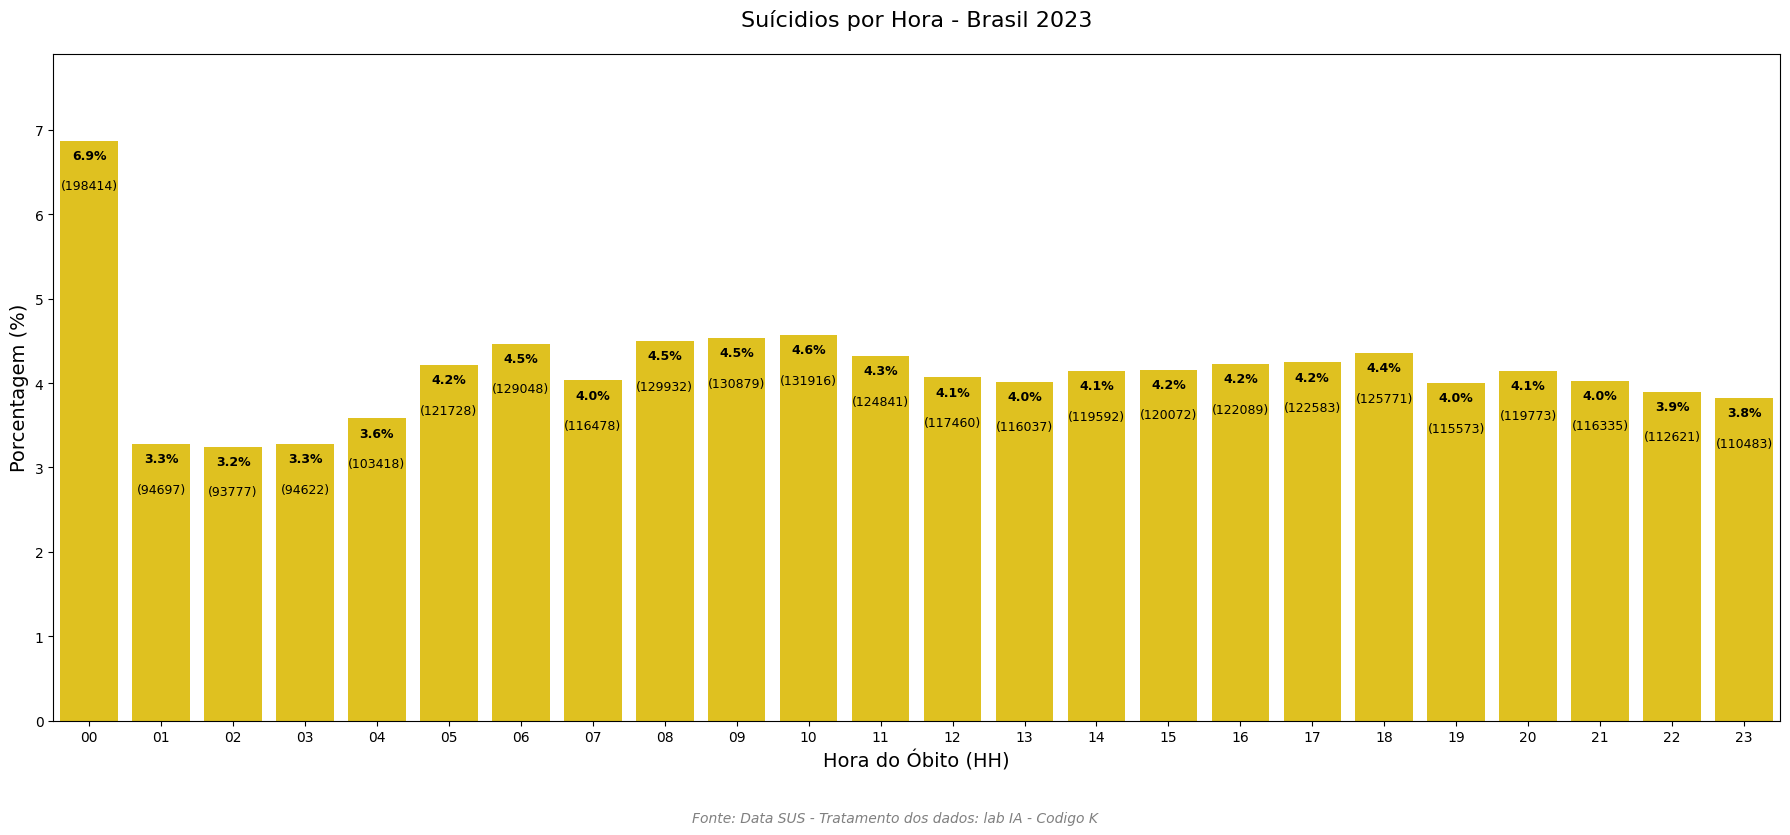

In [10]:
# Filtra removendo '0000' e cria uma cópia explícita
df_filtered = df[df['HORAOBITO'] != 0].copy()

# --- Correção para o primeiro FutureWarning ---
# Atribuir diretamente os valores já convertidos para string
# Não precisamos da etapa intermediária de atribuir ''
df_filtered['HORA'] = df_filtered['HORAOBITO'].astype(str).str.zfill(4).str[:2]

# Certificar que todas as horas de 00 a 23 estão presentes no combined_data
# Isso é útil para garantir que o gráfico sempre tenha 24 barras, mesmo que uma hora não tenha dados
all_hours = [str(i).zfill(2) for i in range(24)]
full_range_df = pd.DataFrame({'HORA': all_hours})

# Conta e calcula porcentagem
counts = df_filtered['HORA'].value_counts().sort_index()
percentages = (counts / counts.sum()) * 100

# Criar um DataFrame combinado
combined_data = pd.DataFrame({
    'PORCENTAGEM': percentages,
    'CONTADOR': counts
}).reset_index()
combined_data.columns = ['HORA', 'PORCENTAGEM', 'CONTADOR']

# Unir com todas as horas para garantir que todas apareçam, mesmo que com 0 valores
combined_data = pd.merge(full_range_df, combined_data, on='HORA', how='left').fillna(0)
# Garantir que a coluna HORA está ordenada corretamente (como strings '00', '01', etc.)
combined_data['HORA'] = pd.Categorical(combined_data['HORA'], categories=all_hours, ordered=True)
combined_data = combined_data.sort_values('HORA')


plt.figure(figsize=(18, 9))

yellow_color = '#FFD700'

# --- Correção para o segundo UserWarning: Usar 'color' em vez de 'palette' e 'hue' ---
# Removendo palette e hue. A cor é definida diretamente no argumento 'color'.
ax = sns.barplot(x='HORA', y='PORCENTAGEM', data=combined_data, color=yellow_color)

ax.set_title('Suícidios por Hora - Brasil 2023', fontsize=16, pad=20)
ax.set_xlabel('Hora do Óbito (HH)', fontsize=14)
ax.set_ylabel('Porcentagem (%)', fontsize=14)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

for index, p in enumerate(ax.patches):
    height = p.get_height()
    # Acessa o valor do contador correspondente à barra atual
    # Usamos o `combined_data.iloc[index]` para garantir que pegamos o valor correto
    # correspondente à ordem das barras no gráfico, que já está ordenada por 'HORA'
    count_value = combined_data.iloc[index]['CONTADOR']

    y_position_percent = height - (ax.get_ylim()[1] * 0.03)
    y_position_count = height - (ax.get_ylim()[1] * 0.08)

    # Apenas para garantir que o texto não apareça se a altura for 0 (0%)
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2.,
                y_position_percent,
                f'{height:.1f}%',
                ha='center', fontsize=9, color='black', fontweight='bold')

        ax.text(p.get_x() + p.get_width()/2.,
                y_position_count,
                f'({int(count_value)})',
                ha='center', fontsize=9, color='black')

# Definindo o limite superior do eixo Y com base nos dados reais
max_percentage = combined_data['PORCENTAGEM'].max()
# Ajustar o limite para dar espaço suficiente para o texto, mesmo que a barra seja baixa
# Se não houver dados, max_percentage pode ser 0. Evitar multiplicar por 0.
if max_percentage > 0:
    ax.set_ylim(0, max_percentage * 1.15) # Aumentei um pouco para 1.15
else:
    ax.set_ylim(0, 1) # Define um limite mínimo se não houver dados

# Ajustar o rect para dar mais espaço para a fonte e o título
plt.tight_layout(rect=[0, 0.07, 1, 0.95])

# Coloca a fonte "Data SUS" abaixo do gráfico
plt.figtext(0.5, 0.03, 'Fonte: Data SUS - Tratamento dos dados: lab IA - Codigo K', ha='center', fontsize=10, style='italic', color='gray')

plt.show()

In [15]:
df['NATURAL'].value_counts()

,count
NATURAL,
835,4472
831,3815
843,3299
841,2226
829,1755
823,1647
842,1565
833,1495
826,1351


In [26]:
df

,HORAOBITO,NATURAL,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,...,OCUPMAE,QTDFILVIVO,QTDFILMORT,ASSISTMED,LINHAA,LINHAB,CAUSABAS,DTATESTADO,CIRCOBITO,DTCADINV
24,1100,813,130260,441,1,4,9,2,1,,...,,,,2,*T71X,*S128,X709,02012023,2,
39,1920,812,120020,419,1,4,1,3,1,4,...,,,,1,*T71X,*X700,X700,05012023,2,
137,1200,812,120040,442,1,4,1,3,2,,...,,,,9,*R090,*S109,X700,14012023,2,
166,0830,812,120060,461,2,4,3,3,2,5,...,,,,9,*R090,*S129,X700,18012023,2,
192,0100,812,120040,426,1,4,1,5,5,,...,,,,9,*R090,*X700,X700,20012023,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887941,0900,821,211000,436,2,2,1,4,2,8,...,,,,2,*T71X,*X700,X700,23122023,2,15012024
2887968,2100,829,290320,435,1,1,9,9,9,,...,,,,2,*T71X,*X707,X707,25122023,2,
2887988,1410,841,411770,454,1,1,2,4,3,3,...,,,,1,*J960,*N179,X697,25122023,2,
2888002,,817,171750,442,1,4,2,4,3,,...,,,,2,*X700,*T71X,X700,26122023,2,


In [27]:
# Substitua df pelo seu DataFrame se tiver outro nome
# df = seu_dataframe

# Caminho de saída
arquivo = 'dados_suicidios_préprocessados.xlsx'

# Exportando para Excel
df.to_excel(arquivo, index=False)

# Para fazer o download direto no Colab
from google.colab import files
files.download(arquivo)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>